In [14]:
import urllib
import arxiv
import requests
import json
import csv
import pandas as pd
from collections import Counter, defaultdict
import numpy as np # for array manipulation
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline 
import datetime

In [ ]:
import arxiv
import pandas as pd

# Example 100 broad research topics
topics = [
    "AI in Healthcare", "Machine Learning Healthcare", "Digital Health", 
    "Blockchain Technology", "Distributed Ledger", "Cryptocurrency", 
    "Cybersecurity Threats", "Quantum Computing Security", "Network Security", 
    "Renewable Energy Technologies", "Solar Energy", "Wind Energy", 
    "Social Media Influence", "Political Polarization", "Misinformation", 
    "Climate Change Impacts", "Food Security", "Biodiversity", 
    "Global Inequality", "Income Inequality", "Emerging Economies",
    "Mental Health and Social Media", "Teen Mental Health", "Adolescent Psychology",
    "Telemedicine in Rural Areas", "Remote Healthcare", "Digital Health Access",
    "Nutrition and Mental Health", "Diet and Wellbeing", "Food and Mood",
    "Remote Work Impact", "Work from Home", "Urban Development", 
    "Urban Farming Solutions", "Sustainable Food Systems", "Vertical Farming",
    "CRISPR Ethics", "Gene Editing", "Genetic Engineering Ethics",
    "Future of Social Media", "Social Media Trends", "Platform Evolution",
    "Quantum Dots", "Nanomaterials", "Nanoelectronics",
    "Protein Folding", "Bioinformatics", "Molecular Dynamics",
    "Drug Discovery AI", "Computational Biology", "Pharmaceutical AI",
    "Robotics", "Autonomous Systems", "Industrial Automation",
    "Electric Vehicles", "Battery Technologies", "Energy Storage",
    "Climate Modeling", "Weather Prediction", "Atmospheric Science",
    "Smart Cities", "IoT", "Urban Sensors",
    "Education Technology", "Online Learning", "EdTech AI",
    "Virtual Reality", "Augmented Reality", "Mixed Reality",
    "Human-Computer Interaction", "UX Design", "Cognitive Systems",
    "Natural Language Processing", "Text Mining", "Language Models",
    "Computer Vision", "Image Recognition", "Medical Imaging",
    "Sustainable Architecture", "Green Buildings", "Eco-friendly Construction",
    "Water Resources Management", "Hydrology", "Irrigation Systems",
    "Microbiome Research", "Gut Health", "Probiotics",
    "Cancer Immunotherapy", "Oncology AI", "Precision Medicine",
    "Social Robotics", "Assistive AI", "Human-Robot Interaction",
    "Deep Learning", "Neural Networks", "Representation Learning",
    "Explainable AI", "AI Ethics", "Responsible AI",
    "Climate Policy", "Environmental Economics", "Carbon Pricing",
    "Digital Twins", "Simulation Models", "Predictive Modeling",
    "Augmented Healthcare", "Wearable Health Tech", "Remote Patient Monitoring"
]

# Parameters for arXiv API client
client = arxiv.Client(
    page_size=1000,   # fetch 1000 papers per request
    delay_seconds=3,
    num_retries=3
)

all_results = []

# Target ~50k papers, limit 500 per topic
papers_per_topic = 500

for topic in topics:
    search = arxiv.Search(
        query=f'"{topic}"',
        sort_by=arxiv.SortCriterion.SubmittedDate,
        sort_order=arxiv.SortOrder.Descending,
        max_results=papers_per_topic
    )

    print(f"Fetching papers for topic: {topic}")
    for paper in client.results(search):
        paper_dict = vars(paper)
        paper_dict["search_topic"] = topic
        all_results.append(paper_dict)

# Convert to DataFrame
df = pd.DataFrame(all_results)


# Save to CSV
df.to_csv("arxiv_100_topics_50k.csv", index=False)

print(f"Collected {len(df)} papers across {len(topics)} topics.")
df.head()


Fetching papers for topic: AI in Healthcare
Fetching papers for topic: Machine Learning Healthcare
Fetching papers for topic: Digital Health
Fetching papers for topic: Blockchain Technology
Fetching papers for topic: Distributed Ledger
Fetching papers for topic: Cryptocurrency
Fetching papers for topic: Cybersecurity Threats
Fetching papers for topic: Quantum Computing Security
Fetching papers for topic: Network Security
Fetching papers for topic: Renewable Energy Technologies
Fetching papers for topic: Solar Energy
Fetching papers for topic: Wind Energy
Fetching papers for topic: Social Media Influence
Fetching papers for topic: Political Polarization
Fetching papers for topic: Misinformation
Fetching papers for topic: Climate Change Impacts
Fetching papers for topic: Food Security
Fetching papers for topic: Biodiversity
Fetching papers for topic: Global Inequality
Fetching papers for topic: Income Inequality
Fetching papers for topic: Emerging Economies
Fetching papers for topic: Men

In [1]:
import pandas as pd
df=pd.read_csv('/kaggle/input/arxivr/arxiv_100_topics.csv')

In [2]:
import pandas as pd

df['published'] = pd.to_datetime(df['published'])
df['updated'] = pd.to_datetime(df['updated'])


In [3]:
import re

def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    text = re.sub(r'\n', ' ', text)   # Remove newlines
    return text.strip()

df['title'] = df['title'].apply(clean_text)
df['abstract'] = df['summary'].apply(clean_text)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12760 entries, 0 to 12759
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   entry_id          12760 non-null  object             
 1   updated           12760 non-null  datetime64[ns, UTC]
 2   published         12760 non-null  datetime64[ns, UTC]
 3   title             12760 non-null  object             
 4   authors           12760 non-null  object             
 5   summary           12760 non-null  object             
 6   comment           6887 non-null   object             
 7   journal_ref       1615 non-null   object             
 8   doi               2317 non-null   object             
 9   primary_category  12760 non-null  object             
 10  categories        12760 non-null  object             
 11  links             12760 non-null  object             
 12  pdf_url           12760 non-null  object             
 13  _

In [5]:


# Drop columns 'B' and 'C'
df= df.drop(columns=['summary', 'comment','journal_ref','doi'])



In [6]:
import ast 
df['authors'] = df['authors'].apply(lambda x: [a.strip() for a in x.split(',')]) 
df['categories'] = df['categories'].apply(lambda x: [c.strip() for c in x.split()]) # space-separated 

In [7]:
import tensorflow_hub as hub

# Load pre-trained Universal Sentence Encoder
encoder = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

def create_embedding(title, abstract):
    text = f"{title}. {abstract}"
    return encoder([text])[0].numpy()  # 512-d vector

# Apply to dataset
df['embedding'] = df.apply(lambda row: create_embedding(row['title'], row['abstract']), axis=1)


2025-08-15 17:30:48.277727: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755279048.567526      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755279048.679810      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-15 17:31:24.412728: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [8]:
import networkx as nx
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

G = nx.Graph()

# Add paper nodes
for idx, row in df.iterrows():
    G.add_node(row['entry_id'], type='paper', embedding=row['embedding'], title=row['title'])

# Add co-author edges
for idx, row in df.iterrows():
    authors = row['authors']
    for i in range(len(authors)):
        for j in range(i+1, len(authors)):
            G.add_edge(authors[i], authors[j], type='coauthor')

# Optional: add embedding similarity edges (top-5 similar papers)
embeddings = np.stack(df['embedding'].tolist())
similarity_matrix = cosine_similarity(embeddings)
top_k = 5
for i in range(similarity_matrix.shape[0]):
    top_indices = similarity_matrix[i].argsort()[-top_k-1:-1]
    for j in top_indices:
        G.add_edge(df['entry_id'].iloc[i], df['entry_id'].iloc[j], type='similarity')


In [9]:
# =================== Imports ===================
import tensorflow as tf
from tensorflow.keras import layers, Model
import numpy as np
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
from datetime import datetime
from tqdm import tqdm

# =================== 0. TPU Setup ===================
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
    print("Running on TPU")
except ValueError:
    strategy = tf.distribute.get_strategy()
    print("TPU not found, using default strategy")
print("Number of replicas:", strategy.num_replicas_in_sync)

# =================== 1. Build Knowledge Graph ===================
G = nx.Graph()
for idx, row in df.iterrows():
    G.add_node(row['entry_id'], embedding=row['embedding'], title=row['title'])

# Co-author edges
for idx, row in df.iterrows():
    authors = row['authors']
    for i in range(len(authors)):
        for j in range(i+1, len(authors)):
            G.add_edge(authors[i], authors[j], type='coauthor')

# Category edges
category_to_papers = {}
for idx, row in df.iterrows():
    for cat in row['categories']:
        category_to_papers.setdefault(cat, []).append(row['entry_id'])
for papers in category_to_papers.values():
    for i in range(len(papers)):
        for j in range(i+1, len(papers)):
            G.add_edge(papers[i], papers[j], type='category')

# Similarity edges (top-10)
embeddings = np.stack(df['embedding'].tolist())
similarity_matrix = cosine_similarity(embeddings)
top_k = 10
for i in range(similarity_matrix.shape[0]):
    top_indices = similarity_matrix[i].argsort()[-top_k-1:-1]
    for j in top_indices:
        G.add_edge(df['entry_id'].iloc[i], df['entry_id'].iloc[j], type='similarity')

# =================== 2. Prepare Node Features & Normalized Adjacency ===================
node_features = np.stack(df['embedding'].tolist())
num_nodes = node_features.shape[0]
node_id_to_index = {nid: idx for idx, nid in enumerate(df['entry_id'].tolist())}

# Build adjacency matrix
adj_matrix = np.zeros((num_nodes, num_nodes), dtype=np.float32)
for u, v, d in G.edges(data=True):
    if u in node_id_to_index and v in node_id_to_index:
        u_idx, v_idx = node_id_to_index[u], node_id_to_index[v]
        adj_matrix[u_idx, v_idx] = 1
        adj_matrix[v_idx, u_idx] = 1

# Normalize adjacency with self-loops
A_hat = adj_matrix + np.eye(num_nodes)
D_hat = np.diag(np.sum(A_hat, axis=1) ** -0.5)
adj_normalized = D_hat @ A_hat @ D_hat

# Convert to tensors
adj_matrix_tf = tf.convert_to_tensor(adj_normalized, dtype=tf.float32)
node_features_tf = tf.convert_to_tensor(node_features, dtype=tf.float32)

# =================== 3. Graph Convolution Layer ===================
class GraphConvolution(layers.Layer):
    def __init__(self, output_dim, activation=None, dropout_rate=0.0):
        super(GraphConvolution, self).__init__()
        self.output_dim = output_dim
        self.activation = activation
        self.dropout_rate = dropout_rate
        self.dropout = layers.Dropout(dropout_rate)
    
    def build(self, input_shape):
        self.weight = self.add_weight(shape=(input_shape[1], self.output_dim),
                                      initializer='glorot_uniform',
                                      trainable=True)
    
    def call(self, inputs, adjacency, training=False):
        h = tf.matmul(inputs, self.weight)
        h = tf.matmul(adjacency, h)
        if self.activation:
            h = self.activation(h)
        if training and self.dropout_rate > 0:
            h = self.dropout(h, training=training)
        return h

# =================== 4. GNN Model ===================
class SimpleGNN(Model):
    def __init__(self, hidden_dim, output_dim, dropout_rate=0.1):
        super(SimpleGNN, self).__init__()
        self.gcn1 = GraphConvolution(hidden_dim, activation=tf.nn.relu, dropout_rate=dropout_rate)
        self.gcn2 = GraphConvolution(output_dim)
    
    def call(self, x, adj, training=False):
        h = self.gcn1(x, adj, training=training)
        h = self.gcn2(h, adj, training=training)
        return h

hidden_dim = 256
output_dim = 128
dropout_rate = 0.1

# =================== 5. TensorBoard Setup ===================
log_dir = "logs/gnn_" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_writer = tf.summary.create_file_writer(log_dir)

# =================== 6. Training on TPU ===================
with strategy.scope():
    model = SimpleGNN(hidden_dim, output_dim, dropout_rate)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    loss_fn = tf.keras.losses.MeanSquaredError()

epochs = 10
adj_target = adj_matrix_tf

for epoch in range(1, epochs + 1):
    with tf.GradientTape() as tape:
        node_embeddings = model(node_features_tf, adj_matrix_tf, training=True)
        recon = tf.sigmoid(tf.matmul(node_embeddings, node_embeddings, transpose_b=True))
        loss = loss_fn(adj_target, recon)
    
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    
    # TensorBoard logging
    with tensorboard_writer.as_default():
        tf.summary.scalar("loss", loss, step=epoch)
    
    print(f"Epoch {epoch}/{epochs} - Loss: {loss.numpy():.4f}")

# =================== 7. Generate Final Embeddings ===================
final_embeddings = model(node_features_tf, adj_matrix_tf, training=False).numpy()

# =================== 8. Top-K Recommendations for All Papers ===================
K = 5
recommendations = {}
similarity_scores = cosine_similarity(final_embeddings)

for idx, paper_id in enumerate(df['entry_id']):
    top_indices = similarity_scores[idx].argsort()[-K-1:-1][::-1]
    recommended_titles = [df['title'].iloc[i] for i in top_indices]
    recommendations[paper_id] = recommended_titles

# Example usage
paper_idx = 0
print("Paper:", df['title'].iloc[paper_idx])
print("Top-5 recommended papers:")
for t in recommendations[df['entry_id'].iloc[paper_idx]]:
    print("-", t)


TPU not found, using default strategy
Number of replicas: 1
Epoch 1/10 - Loss: 0.2696
Epoch 2/10 - Loss: 0.6161
Epoch 3/10 - Loss: 0.2626
Epoch 4/10 - Loss: 0.2512
Epoch 5/10 - Loss: 0.2499
Epoch 6/10 - Loss: 0.2499
Epoch 7/10 - Loss: 0.2499
Epoch 8/10 - Loss: 0.2499
Epoch 9/10 - Loss: 0.2499
Epoch 10/10 - Loss: 0.2499
Paper: Processing of synthetic data in AI development for healthcare and the definition of personal data in EU law
Top-5 recommended papers:
- AIRCHITECT v2: Learning the Hardware Accelerator Design Space through Unified Representations
- LUT-DLA: Lookup Table as Efficient Extreme Low-Bit Deep Learning Accelerator
- Pioneering High-Speed Pulsar Parameter Estimation Using Convolutional Neural Networks
- SoMa: Identifying, Exploring, and Understanding the DRAM Communication Scheduling Space for DNN Accelerators
- The New Science of Unidentified Aerospace-Undersea Phenomena (UAP)


In [10]:
import pickle

with open("paper_embeddings.pkl", "wb") as f:
    pickle.dump({"ids": df['entry_id'].tolist(), "embeddings": final_embeddings}, f)


In [17]:
# =================== Imports ===================
import tensorflow_hub as hub
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# =================== 1. Load Embeddings ===================
# Assuming you already have df['embedding'] column
embeddings = np.stack(df['embedding'].tolist())
paper_ids = df['entry_id'].tolist()
titles = df['title'].tolist()

# =================== 2. Load Encoder ===================
encoder = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# =================== 3. Recommendation Function ===================
def recommend_papers(query, df, embeddings, top_k=5):
    """
    Input:
        query: str, text query (title or topic)
        df: pandas DataFrame with paper metadata
        embeddings: np.array of shape [num_papers, embedding_dim]
        top_k: number of recommended papers
    Output:
        List of dicts with 'paper_id', 'title', 'score'
    """
    # 1️⃣ Encode the query
    query_embedding = encoder([query]).numpy()

    # 2️⃣ Compute cosine similarity with all paper embeddings
    scores = cosine_similarity(query_embedding, embeddings)[0]

    # 3️⃣ Get top-K indices
    top_indices = scores.argsort()[-top_k:][::-1]

    # 4️⃣ Prepare results
    results = []
    for idx in top_indices:
        results.append({
            "paper_id": df['entry_id'].iloc[idx],
            "title": df['title'].iloc[idx],
            "score": scores[idx]
        })
    return results

# =================== 4. Example Usage ===================
query = "quantum machine learning protein folding"
top_papers = recommend_papers(query, df, embeddings, top_k=5)

print(f"Query: {query}")
print("Top-5 recommended papers:")
for r in top_papers:
    print("-", r['title'], f"(Score: {r['score']:.4f})")


Query: quantum machine learning protein folding
Top-5 recommended papers:
- A study on B-cell epitope prediction based on QSVM and VQC (Score: 0.5333)
- Resource analysis of quantum algorithms for coarse-grained protein folding models (Score: 0.5241)
- Quantum continual learning on a programmable superconducting processor (Score: 0.5148)
- Assessing Projected Quantum Kernels for the Classification of IoT Data (Score: 0.5098)
- The prospects of quantum computing in computational molecular biology (Score: 0.5047)


In [34]:
pip install gradio pyvis

* Running on local URL:  http://127.0.0.1:7861
It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://6d4ca2d6f49a28151f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


graph.html


In [42]:
# =================== Imports ===================
import gradio as gr
import networkx as nx
import matplotlib.pyplot as plt
import tensorflow_hub as hub
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
import re
from io import BytesIO

# =================== Preprocessing ===================
def clean_label(text):
    # Remove LaTeX/math symbols and special characters
    text = re.sub(r"[\\${}^_]", "", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

df['safe_title'] = df['title'].apply(clean_label)

# =================== Embeddings ===================
embeddings = np.stack(df['embedding'].tolist())
titles = df['safe_title'].tolist()
paper_ids = df['entry_id'].tolist()

# Load encoder
encoder = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# =================== Build Graph ===================
G = nx.Graph()
for idx, row in df.iterrows():
    G.add_node(row['entry_id'], title=row['safe_title'])

# Add co-author edges
for idx, row in df.iterrows():
    authors = row['authors']
    for i in range(len(authors)):
        for j in range(i+1, len(authors)):
            G.add_edge(authors[i], authors[j], type='coauthor')

# Add similarity edges (top-5 similar)
similarity_matrix = cosine_similarity(embeddings)
top_k = 5
for i in range(similarity_matrix.shape[0]):
    top_indices = similarity_matrix[i].argsort()[-top_k-1:-1]
    for j in top_indices:
        G.add_edge(paper_ids[i], paper_ids[j], type='similarity')

# =================== Recommendation + Graph Function ===================
from PIL import Image
from io import BytesIO

def recommend_and_plot(query, top_k=5):
    # Encode query
    query_emb = encoder([query]).numpy()
    scores = cosine_similarity(query_emb, embeddings)[0]
    top_indices = scores.argsort()[-top_k:][::-1]
    
    # Prepare recommendations
    recommendations = [f"{titles[idx]} (Score: {scores[idx]:.4f})" for idx in top_indices]
    
    # Prepare subgraph for visualization (query paper + neighbors)
    sub_nodes = [paper_ids[idx] for idx in top_indices]
    for idx in top_indices:
        neighbors = list(G.neighbors(paper_ids[idx]))
        sub_nodes.extend(neighbors)
    sub_nodes = list(set(sub_nodes))
    
    subG = G.subgraph(sub_nodes)
    
    # Draw graph
    plt.figure(figsize=(12,8))
    pos = nx.spring_layout(subG, seed=42)
    node_labels = nx.get_node_attributes(subG, 'title')
    nx.draw(subG, pos, with_labels=True, labels=node_labels, node_size=800, node_color='skyblue', font_size=8, font_weight='bold', edge_color='gray')
    
    # Convert to PIL Image
    buf = BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight')
    plt.close()
    buf.seek(0)
    img = Image.open(buf)
    
    return "\n".join(recommendations), img

# =================== Gradio Interface ===================
iface = gr.Interface(
    fn=recommend_and_plot,
    inputs=[gr.Textbox(label="Enter Research Topic / Paper Title"), 
            gr.Slider(minimum=1, maximum=10, value=5, step=1, label="Number of Recommendations")],
    outputs=[gr.Textbox(label="Top-K Recommended Papers"), gr.Image(label="Paper Graph")],
    title="ArXiv Research Discovery Engine",
    description="Type your research query and get top-K papers along with a network visualization."
)

iface.launch()


* Running on local URL:  http://127.0.0.1:7869
It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://577787c1b89849c169.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## trend prediction

In [47]:
df.head()

,entry_id,updated,published,title,authors,primary_category,categories,links,pdf_url,_raw,search_topic,abstract,embedding,year_month,safe_title,year
0,http://arxiv.org/abs/2508.08353v1,2025-08-11 17:59:06+00:00,2025-08-11 17:59:06+00:00,Processing of synthetic data in AI development...,"[[arxiv.Result.Author('Vibeke Binz Vallevik'),...",cs.CY,"[['cs.CY',, 'cs.AI']]",[arxiv.Result.Link('http://arxiv.org/abs/2508....,http://arxiv.org/pdf/2508.08353v1,"{'id': 'http://arxiv.org/abs/2508.08353v1', 'g...",AI in Healthcare,Artificial intelligence (AI) has the potential...,"[0.0043071005, 0.01020335, -0.036382623, 0.013...",2025-08,Processing of synthetic data in AI development...,2025
1,http://arxiv.org/abs/2508.05753v1,2025-08-07 18:10:41+00:00,2025-08-07 18:10:41+00:00,"Explainable AI in Healthcare: to Explain, to P...","[[arxiv.Result.Author('Alex Carriero'), arxiv....",stat.ME,[['stat.ME']],[arxiv.Result.Link('http://arxiv.org/abs/2508....,http://arxiv.org/pdf/2508.05753v1,"{'id': 'http://arxiv.org/abs/2508.05753v1', 'g...",AI in Healthcare,Explainable Artificial Intelligence (AI) metho...,"[-0.034412343, 0.018265188, 0.028431782, -0.04...",2025-08,"Explainable AI in Healthcare: to Explain, to P...",2025
2,http://arxiv.org/abs/2508.04325v1,2025-08-06 11:11:40+00:00,2025-08-06 11:11:40+00:00,Beyond the Leaderboard: Rethinking Medical Ben...,"[[arxiv.Result.Author('Zizhan Ma'), arxiv.Resu...",cs.CL,"[['cs.CL',, 'cs.AI',, 'cs.CV',, 'cs.LG',, 'cs....",[arxiv.Result.Link('http://arxiv.org/abs/2508....,http://arxiv.org/pdf/2508.04325v1,"{'id': 'http://arxiv.org/abs/2508.04325v1', 'g...",AI in Healthcare,Large language models (LLMs) show significant ...,"[-0.06082106, -0.0016260737, -0.04027803, -0.0...",2025-08,Beyond the Leaderboard: Rethinking Medical Ben...,2025
3,http://arxiv.org/abs/2507.06077v1,2025-07-08 15:16:50+00:00,2025-07-08 15:16:50+00:00,AI-Based Demand Forecasting and Load Balancing...,"[[arxiv.Result.Author('Iman Rahimi'), arxiv.Re...",cs.AI,[['cs.AI']],[arxiv.Result.Link('http://arxiv.org/abs/2507....,http://arxiv.org/pdf/2507.06077v1,"{'id': 'http://arxiv.org/abs/2507.06077v1', 'g...",AI in Healthcare,This paper tackles the urgent need for efficie...,"[-0.039335687, -0.05529456, -0.049217816, -0.0...",2025-07,AI-Based Demand Forecasting and Load Balancing...,2025
4,http://arxiv.org/abs/2507.14147v1,2025-07-02 14:11:14+00:00,2025-07-02 14:11:14+00:00,Graph Convolutional Neural Networks to Model t...,"[[arxiv.Result.Author('Kevin Monteiro'), arxiv...",eess.SP,"[['eess.SP',, 'cs.LG',, 'q-bio.NC']]",[arxiv.Result.Link('http://arxiv.org/abs/2507....,http://arxiv.org/pdf/2507.14147v1,"{'id': 'http://arxiv.org/abs/2507.14147v1', 'g...",AI in Healthcare,Insomnia affects a vast population of the worl...,"[0.004652516, 0.004141465, 0.04559348, -0.0214...",2025-07,Graph Convolutional Neural Networks to Model t...,2025


In [48]:
df['year'] = df['published'].dt.year

In [50]:
df_exploded = df.explode('categories')
df_exploded.head()

,entry_id,updated,published,title,authors,primary_category,categories,links,pdf_url,_raw,search_topic,abstract,embedding,year_month,safe_title,year
0,http://arxiv.org/abs/2508.08353v1,2025-08-11 17:59:06+00:00,2025-08-11 17:59:06+00:00,Processing of synthetic data in AI development...,"[[arxiv.Result.Author('Vibeke Binz Vallevik'),...",cs.CY,"['cs.CY',",[arxiv.Result.Link('http://arxiv.org/abs/2508....,http://arxiv.org/pdf/2508.08353v1,"{'id': 'http://arxiv.org/abs/2508.08353v1', 'g...",AI in Healthcare,Artificial intelligence (AI) has the potential...,"[0.0043071005, 0.01020335, -0.036382623, 0.013...",2025-08,Processing of synthetic data in AI development...,2025
0,http://arxiv.org/abs/2508.08353v1,2025-08-11 17:59:06+00:00,2025-08-11 17:59:06+00:00,Processing of synthetic data in AI development...,"[[arxiv.Result.Author('Vibeke Binz Vallevik'),...",cs.CY,'cs.AI'],[arxiv.Result.Link('http://arxiv.org/abs/2508....,http://arxiv.org/pdf/2508.08353v1,"{'id': 'http://arxiv.org/abs/2508.08353v1', 'g...",AI in Healthcare,Artificial intelligence (AI) has the potential...,"[0.0043071005, 0.01020335, -0.036382623, 0.013...",2025-08,Processing of synthetic data in AI development...,2025
1,http://arxiv.org/abs/2508.05753v1,2025-08-07 18:10:41+00:00,2025-08-07 18:10:41+00:00,"Explainable AI in Healthcare: to Explain, to P...","[[arxiv.Result.Author('Alex Carriero'), arxiv....",stat.ME,['stat.ME'],[arxiv.Result.Link('http://arxiv.org/abs/2508....,http://arxiv.org/pdf/2508.05753v1,"{'id': 'http://arxiv.org/abs/2508.05753v1', 'g...",AI in Healthcare,Explainable Artificial Intelligence (AI) metho...,"[-0.034412343, 0.018265188, 0.028431782, -0.04...",2025-08,"Explainable AI in Healthcare: to Explain, to P...",2025
2,http://arxiv.org/abs/2508.04325v1,2025-08-06 11:11:40+00:00,2025-08-06 11:11:40+00:00,Beyond the Leaderboard: Rethinking Medical Ben...,"[[arxiv.Result.Author('Zizhan Ma'), arxiv.Resu...",cs.CL,"['cs.CL',",[arxiv.Result.Link('http://arxiv.org/abs/2508....,http://arxiv.org/pdf/2508.04325v1,"{'id': 'http://arxiv.org/abs/2508.04325v1', 'g...",AI in Healthcare,Large language models (LLMs) show significant ...,"[-0.06082106, -0.0016260737, -0.04027803, -0.0...",2025-08,Beyond the Leaderboard: Rethinking Medical Ben...,2025
2,http://arxiv.org/abs/2508.04325v1,2025-08-06 11:11:40+00:00,2025-08-06 11:11:40+00:00,Beyond the Leaderboard: Rethinking Medical Ben...,"[[arxiv.Result.Author('Zizhan Ma'), arxiv.Resu...",cs.CL,"'cs.AI',",[arxiv.Result.Link('http://arxiv.org/abs/2508....,http://arxiv.org/pdf/2508.04325v1,"{'id': 'http://arxiv.org/abs/2508.04325v1', 'g...",AI in Healthcare,Large language models (LLMs) show significant ...,"[-0.06082106, -0.0016260737, -0.04027803, -0.0...",2025-08,Beyond the Leaderboard: Rethinking Medical Ben...,2025


In [51]:
trend_df = df_exploded.groupby(['year', 'categories']).size().reset_index(name='count')


In [52]:
trend_df.head()

,year,categories,count
0,1994,'nlin.CD'],1
1,1994,"['chao-dyn',",1
2,1994,['gr-qc'],1
3,1995,['astro-ph'],1
4,1997,"'cond-mat.stat-mech',",1


In [61]:
df['categories'].head()

0                                [['cs.CY',, 'cs.AI']]
1                                        [['stat.ME']]
2    [['cs.CL',, 'cs.AI',, 'cs.CV',, 'cs.LG',, 'cs....
3                                          [['cs.AI']]
4                 [['eess.SP',, 'cs.LG',, 'q-bio.NC']]
Name: categories, dtype: object

In [74]:
import re

def clean_categories(x):
    x = str(x)
    
    # Replace double commas with single comma
    x = x.replace(",,", ",")
    
    # Use regex to extract category patterns like cs.AI, stat.ME, etc.
    categories = re.findall(r'[a-z\-]+(?:\.[A-Z]+)', x)
    
    return categories

df['categories_clean'] = df['categories'].apply(clean_categories)

# Check
df['categories_clean'].head()


0                         [cs.CY, cs.AI]
1                              [stat.ME]
2    [cs.CL, cs.AI, cs.CV, cs.LG, cs.MM]
3                                [cs.AI]
4             [eess.SP, cs.LG, q-bio.NC]
Name: categories_clean, dtype: object

In [79]:
df['categories_clean'].head()

0                         [cs.CY, cs.AI]
1                              [stat.ME]
2    [cs.CL, cs.AI, cs.CV, cs.LG, cs.MM]
3                                [cs.AI]
4             [eess.SP, cs.LG, q-bio.NC]
Name: categories_clean, dtype: object

https://symbolize.stripped_domain/r/?trace=79fab1622ee6,79fab155604f&map= 
*** SIGTERM received by PID 10 (TID 10) on cpu 9 from PID 1; stack trace: ***
PC: @     0x79fab1622ee6  (unknown)  epoll_wait
    @     0x79f996f02841       1888  (unknown)
    @     0x79fab1556050  (unknown)  (unknown)
https://symbolize.stripped_domain/r/?trace=79fab1622ee6,79f996f02840,79fab155604f&map= 
E0815 17:26:54.303231      10 coredump_hook.cc:262] RAW: Remote crash gathering disabled for SIGTERM.


In [78]:
# =================== Imports ===================
import gradio as gr
import matplotlib.pyplot as plt
import tensorflow_hub as hub
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
import networkx as nx
from PIL import Image
from io import BytesIO

# =================== 1. Load Encoder ===================
encoder = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# =================== 2. Precompute Embeddings ===================
# Assuming df has 'embedding', 'entry_id', 'title', 'categories_clean', 'published', 'authors'
embeddings = np.stack(df['embedding'].tolist())
titles = df['title'].tolist()
paper_ids = df['entry_id'].tolist()

# =================== 3. Build Graph ===================
G = nx.Graph()
for idx, row in df.iterrows():
    G.add_node(row['entry_id'], title=row['title'])

# Co-author edges
for idx, row in df.iterrows():
    authors = row['authors']
    for i in range(len(authors)):
        for j in range(i+1, len(authors)):
            G.add_edge(authors[i], authors[j], type='coauthor')

# Similarity edges (top-5)
similarity_matrix = cosine_similarity(embeddings)
top_k_sim = 5
for i in range(similarity_matrix.shape[0]):
    top_indices = similarity_matrix[i].argsort()[-top_k_sim-1:-1]
    for j in top_indices:
        G.add_edge(paper_ids[i], paper_ids[j], type='similarity')

# =================== 4. Trend Plot Function ===================
def plot_category_trend(category, freq='M'):
    subset = df[df['categories_clean'].apply(lambda x: category in x)]
    if subset.empty:
        return None
    
    trend = subset.groupby(pd.Grouper(key='published', freq=freq)).size()
    
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(trend.index, trend.values, marker='o')
    ax.set_title(f"Trend of {category} papers over time")
    ax.set_xlabel("Time")
    ax.set_ylabel("Number of papers")
    plt.xticks(rotation=45)
    plt.grid(True)
    
    return fig

# =================== 5. Recommendation + Graph + Trend Function ===================
def recommend_graph_trend(query, category, top_k):
    # 1️⃣ Recommendations
    query_emb = encoder([query]).numpy()
    scores = cosine_similarity(query_emb, embeddings)[0]
    top_indices = scores.argsort()[-top_k:][::-1]
    recommendations = [f"{titles[idx]} (Score: {scores[idx]:.4f})" for idx in top_indices]

    # 2️⃣ Subgraph for visualization
    sub_nodes = [paper_ids[idx] for idx in top_indices]
    for idx in top_indices:
        neighbors = list(G.neighbors(paper_ids[idx]))
        sub_nodes.extend(neighbors)
    sub_nodes = list(set(sub_nodes))
    subG = G.subgraph(sub_nodes)
    
    # Draw subgraph
    plt.figure(figsize=(12,8))
    pos = nx.spring_layout(subG, seed=42)
    node_labels = nx.get_node_attributes(subG, 'title')
    nx.draw(subG, pos, with_labels=True, labels=node_labels, node_size=800,
            node_color='skyblue', font_size=8, font_weight='bold', edge_color='gray')
    
    # Convert to PIL Image
    buf = BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight')
    plt.close()
    buf.seek(0)
    graph_img = Image.open(buf)
    
    # 3️⃣ Trend plot
    trend_fig = plot_category_trend(category)
    
    return "\n".join(recommendations), graph_img, trend_fig

# =================== 6. Gradio Interface ===================
iface = gr.Interface(
    fn=recommend_graph_trend,
    inputs=[
        gr.Textbox(label="Research Query / Paper Title"),
        gr.Textbox(label="Category for Trend (e.g., cs.CY)"),
        gr.Slider(minimum=1, maximum=10, value=5, step=1, label="Number of Recommendations")
    ],
    outputs=[
        gr.Textbox(label="Top-K Recommended Papers"),
        gr.Image(label="Connected Paper Graph"),
        gr.Plot(label="Category Trend Plot")
    ],
    title="ArXiv Research Discovery Engine",
    description="Get top-K recommended papers, visualize their connections, and plot the trend of a category over time."
)

iface.launch()


* Running on local URL:  http://127.0.0.1:7874
It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://0706058ddf62cc06aa.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# evaluation

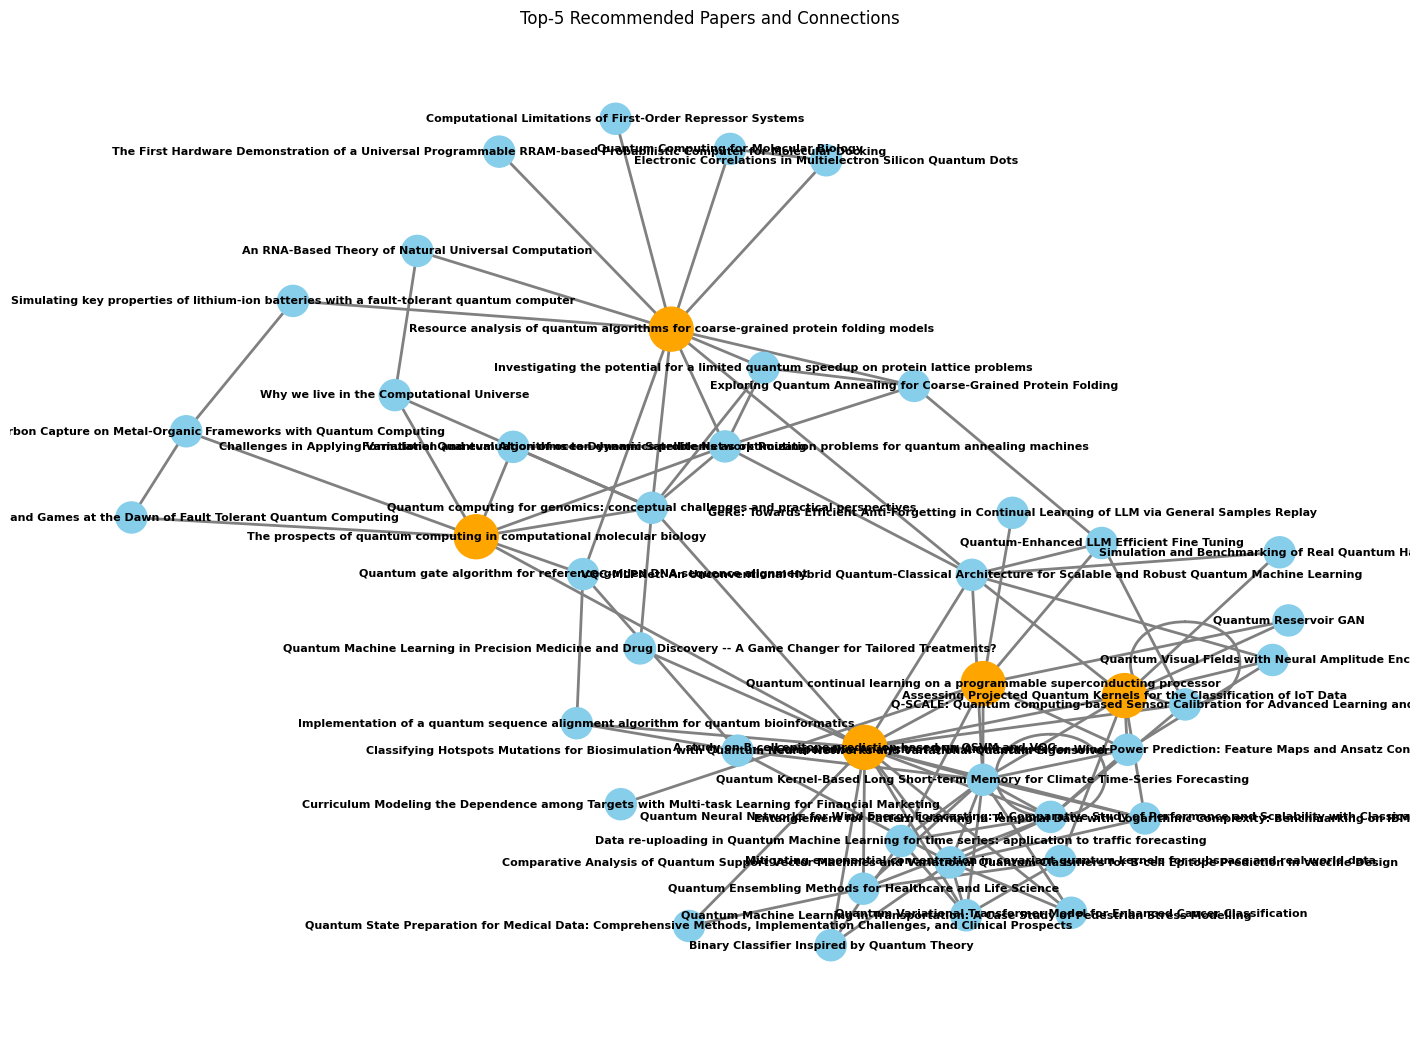

Top-K Recommended Papers:
- A study on B-cell epitope prediction based on QSVM and VQC
- Resource analysis of quantum algorithms for coarse-grained protein folding models
- Quantum continual learning on a programmable superconducting processor
- Assessing Projected Quantum Kernels for the Classification of IoT Data
- The prospects of quantum computing in computational molecular biology
Top-K Degree Centrality: {'A study on B-cell epitope prediction based on QSVM and VQC': 0.45238095238095233, 'Resource analysis of quantum algorithms for coarse-grained protein folding models': 0.2857142857142857, 'Quantum continual learning on a programmable superconducting processor': 0.19047619047619047, 'Assessing Projected Quantum Kernels for the Classification of IoT Data': 0.21428571428571427, 'The prospects of quantum computing in computational molecular biology': 0.19047619047619047}
Top-K Betweenness Centrality: {'A study on B-cell epitope prediction based on QSVM and VQC': 0.4073249195635954, 

In [17]:
# =================== Imports ===================
import numpy as np
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
import tensorflow_hub as hub
import matplotlib.pyplot as plt

# =================== Load Encoder ===================
encoder = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# =================== Recommendation Functions ===================
def recommend_papers(query, embeddings, titles, top_k=5):
    """
    Returns top-K recommended paper titles
    """
    query_emb = encoder([query]).numpy()
    scores = cosine_similarity(query_emb, embeddings)[0]
    top_indices = scores.argsort()[-top_k:][::-1]
    recommended_titles = [titles[idx] for idx in top_indices]
    return recommended_titles, top_indices, scores

# =================== Graph Functions ===================
def build_graph(df, embeddings, top_k_sim=5):
    """
    Build NetworkX graph with similarity edges (top-K similar)
    """
    G = nx.Graph()
    
    # Add nodes
    for idx, row in df.iterrows():
        G.add_node(row['title'], title=row['title'])
    
    # Add similarity edges
    similarity_matrix = cosine_similarity(embeddings)
    titles_list = df['title'].tolist()
    for i in range(similarity_matrix.shape[0]):
        top_indices = similarity_matrix[i].argsort()[-top_k_sim-1:-1]  # exclude self
        for j in top_indices:
            G.add_edge(titles_list[i], titles_list[j], type='similarity', weight=similarity_matrix[i,j])
    
    # Optional: add co-author edges
    for idx, row in df.iterrows():
        authors = row['authors']
        for i in range(len(authors)):
            for j in range(i+1, len(authors)):
                G.add_edge(authors[i], authors[j], type='coauthor')
    
    return G

def recommend_and_plot_graph(query, embeddings, titles_list, G, top_k=5):
    """
    Full pipeline: recommend top-K papers + plot graph with top-K highlighted
    """
    recommended_titles, top_indices, scores = recommend_papers(query, embeddings, titles_list, top_k=top_k)

    # Prepare subgraph: recommended + neighbors
    sub_nodes = recommended_titles.copy()
    for title in recommended_titles:
        if title in G:
            sub_nodes.extend(list(G.neighbors(title)))
    sub_nodes = list(set(sub_nodes))
    subG = G.subgraph(sub_nodes)

    # Node colors & sizes
    node_colors = ['orange' if node in recommended_titles else 'skyblue' for node in subG.nodes()]
    node_sizes = [1000 if node in recommended_titles else 500 for node in subG.nodes()]

    # Edge colors based on type
    edge_colors = []
    for u, v, data in subG.edges(data=True):
        if data.get('type') == 'coauthor':
            edge_colors.append('green')
        else:
            edge_colors.append('gray')

    # Draw graph
    plt.figure(figsize=(14,10))
    pos = nx.spring_layout(subG, seed=42)
    nx.draw(
        subG,
        pos,
        with_labels=True,
        labels=nx.get_node_attributes(subG, 'title'),
        node_color=node_colors,
        node_size=node_sizes,
        font_size=8,
        font_weight='bold',
        edge_color=edge_colors,
        width=2
    )
    plt.title(f"Top-{top_k} Recommended Papers and Connections")
    plt.show()

    return recommended_titles

# =================== Evaluation Metrics ===================
def precision_at_k(recommended, relevant, k=5):
    return len(set(recommended[:k]) & set(relevant)) / k

def ndcg_at_k(recommended, relevant, k=5):
    dcg = 0.0
    for i, title in enumerate(recommended[:k]):
        if title in relevant:
            dcg += 1 / np.log2(i + 2)
    idcg = sum(1 / np.log2(i + 2) for i in range(min(k, len(relevant))))
    return dcg / idcg if idcg > 0 else 0

def evaluate_graph(subG, recommended_titles):
    degree_centrality = nx.degree_centrality(subG)
    betweenness_centrality = nx.betweenness_centrality(subG)
    top_k_degree = {t: degree_centrality[t] for t in recommended_titles if t in degree_centrality}
    top_k_betweenness = {t: betweenness_centrality[t] for t in recommended_titles if t in betweenness_centrality}
    return top_k_degree, top_k_betweenness

# =================== Automatic Relevant Titles ===================
def get_relevant_titles(df, query_keywords):
    """
    Consider papers whose titles contain any keyword from query
    """
    query_pattern = '|'.join(query_keywords)
    relevant = df[df['title'].str.contains(query_pattern, case=False)]['title'].tolist()
    return relevant

# =================== Example Usage ===================
query = "quantum machine learning protein folding"
query_keywords = query.lower().split()
top_k = 5

# Assuming df has 'title' and 'embedding' columns
embeddings = np.stack(df['embedding'].tolist())
titles = df['title'].tolist()

# Build full graph
G = build_graph(df, embeddings)

# Recommend + plot
recommended_titles = recommend_and_plot_graph(query, embeddings, titles, G, top_k=top_k)
print("Top-K Recommended Papers:")
for t in recommended_titles:
    print("-", t)

# Evaluate graph
sub_nodes = recommended_titles.copy()
for t in recommended_titles:
    sub_nodes.extend(list(G.neighbors(t)))
sub_nodes = list(set(sub_nodes))
subG = G.subgraph(sub_nodes)

degree, betweenness = evaluate_graph(subG, recommended_titles)
print("Top-K Degree Centrality:", degree)
print("Top-K Betweenness Centrality:", betweenness)

# Automatic relevant titles for evaluation
relevant_titles = get_relevant_titles(df, query_keywords)
precision = precision_at_k(recommended_titles, relevant_titles, k=top_k)
ndcg = ndcg_at_k(recommended_titles, relevant_titles, k=top_k)
print(f"Precision@{top_k}: {precision:.4f}, nDCG@{top_k}: {ndcg:.4f}")


A/B test

In [18]:
import numpy as np
import random

def run_ab_test(queries, df, embeddings, titles, algo_a_func, algo_b_func, top_k=5):
    """
    queries: list of query strings
    df: dataframe with papers
    embeddings: paper embeddings
    titles: list of titles
    algo_a_func: function to generate recommendations for A
    algo_b_func: function to generate recommendations for B
    """
    random.shuffle(queries)
    mid = len(queries) // 2
    group_a_queries = queries[:mid]
    group_b_queries = queries[mid:]
    
    metrics_a = []
    metrics_b = []

    for q in group_a_queries:
        rec_titles, _ = algo_a_func(q, embeddings, titles, top_k=top_k)
        relevant = get_relevant_titles(df, q.lower().split())
        precision = precision_at_k(rec_titles, relevant, top_k)
        ndcg = ndcg_at_k(rec_titles, relevant, top_k)
        metrics_a.append((precision, ndcg))
        
    for q in group_b_queries:
        rec_titles, _ = algo_b_func(q, embeddings, titles, top_k=top_k)
        relevant = get_relevant_titles(df, q.lower().split())
        precision = precision_at_k(rec_titles, relevant, top_k)
        ndcg = ndcg_at_k(rec_titles, relevant, top_k)
        metrics_b.append((precision, ndcg))
    
    # Average metrics
    avg_precision_a = np.mean([m[0] for m in metrics_a])
    avg_ndcg_a = np.mean([m[1] for m in metrics_a])
    
    avg_precision_b = np.mean([m[0] for m in metrics_b])
    avg_ndcg_b = np.mean([m[1] for m in metrics_b])
    
    print("=== A/B Test Results ===")
    print(f"Algorithm A: Precision@{top_k}={avg_precision_a:.4f}, nDCG@{top_k}={avg_ndcg_a:.4f}")
    print(f"Algorithm B: Precision@{top_k}={avg_precision_b:.4f}, nDCG@{top_k}={avg_ndcg_b:.4f}")
    
    return (avg_precision_a, avg_ndcg_a), (avg_precision_b, avg_ndcg_b)


In [19]:
# Algo A: current cosine similarity on USE embeddings
def algo_a(query, embeddings, titles, top_k=5):
    query_emb = encoder([query]).numpy()
    scores = cosine_similarity(query_emb, embeddings)[0]
    top_indices = scores.argsort()[-top_k:][::-1]
    rec_titles = [titles[idx] for idx in top_indices]
    return rec_titles, top_indices

# Algo B: cosine similarity + co-author graph score
def algo_b(query, embeddings, titles, top_k=5):
    query_emb = encoder([query]).numpy()
    scores = cosine_similarity(query_emb, embeddings)[0]
    
    # Example: boost score if paper has high degree centrality
    degree_centrality = nx.degree_centrality(G)
    boosted_scores = scores + np.array([degree_centrality[t] if t in degree_centrality else 0 for t in titles])
    
    top_indices = boosted_scores.argsort()[-top_k:][::-1]
    rec_titles = [titles[idx] for idx in top_indices]
    return rec_titles, top_indices


In [20]:
queries = ["quantum machine learning", "protein folding", "B-cell epitope prediction", "quantum algorithms", "computational biology"]
run_ab_test(queries, df, embeddings, titles, algo_a, algo_b, top_k=5)


=== A/B Test Results ===
Algorithm A: Precision@5=0.8000, nDCG@5=0.8422
Algorithm B: Precision@5=0.8000, nDCG@5=0.8383


((0.8, 0.8421757737602428), (0.7999999999999999, 0.8382571482945592))